<a href="https://colab.research.google.com/github/sebakrys/data-science-bootcamp-A-Z/blob/main/05_Dane_gieldowe_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)

Numpy: 1.26.4
Pandas: 2.1.4


## Loading Stock Data

In [2]:
from os import name
def fetch_financial_data(company="AMZN"):
  """Fetch stock data from stooq.pl service"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-09-27 to 2019-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-27,190.6800,190.9000,187.3400,187.9700,36002316
2024-09-26,194.3100,194.5300,189.5400,191.1600,36334854
2024-09-25,193.7500,193.9498,192.1600,192.5300,26391144
2024-09-24,194.2700,195.3700,190.1300,193.9600,43478926
2024-09-23,191.6400,194.4500,190.5700,193.8800,36993111
...,...,...,...,...,...
2019-10-04,86.3010,87.0290,85.9615,86.9825,49785540
2019-10-03,85.6500,86.2500,84.2530,86.2210,72487420
2019-10-02,86.3870,86.4445,85.2500,85.6615,66769520


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-27,190.68,190.9000,187.34,187.97,36002316
2024-09-26,194.31,194.5300,189.54,191.16,36334854
2024-09-25,193.75,193.9498,192.16,192.53,26391144
2024-09-24,194.27,195.3700,190.13,193.96,43478926
2024-09-23,191.64,194.4500,190.57,193.88,36993111
2024-09-20,190.23,191.8400,187.41,191.60,100378553
2024-09-19,190.04,190.9900,188.47,189.87,39543168
2024-09-18,186.45,188.8000,185.06,186.43,34448130
2024-09-17,186.85,189.4500,186.14,186.88,26091682


In [6]:
df.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-04,86.3010,87.0290,85.9615,86.9825,49785540
2019-10-03,85.6500,86.2500,84.2530,86.2210,72487420
2019-10-02,86.3870,86.4445,85.2500,85.6615,66769520
2019-10-01,87.3000,87.7800,86.4205,86.7825,63409200
2019-09-30,86.3495,86.8730,85.4610,86.7955,55215360


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns]
df.head(5)

,open,high,low,close,volume
Date,,,,,
2024-09-27,190.68,190.9000,187.34,187.97,36002316
2024-09-26,194.31,194.5300,189.54,191.16,36334854
2024-09-25,193.75,193.9498,192.16,192.53,26391144
2024-09-24,194.27,195.3700,190.13,193.96,43478926
2024-09-23,191.64,194.4500,190.57,193.88,36993111


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.407635e+02,3.138442e+01,8.207550e+01,1.135575e+02,1.484400e+02,1.665375e+02,2.000900e+02
high,1258.0,1.424816e+02,3.150720e+01,8.348000e+01,1.158850e+02,1.509750e+02,1.681347e+02,2.012000e+02
low,1258.0,1.389299e+02,3.112275e+01,8.130160e+01,1.121075e+02,1.459410e+02,1.645305e+02,1.990450e+02
close,1258.0,1.407295e+02,3.128945e+01,8.182000e+01,1.138840e+02,1.481970e+02,1.662625e+02,2.000000e+02
volume,1258.0,6.967191e+07,3.359243e+07,1.762674e+07,4.803415e+07,6.111908e+07,8.223073e+07,3.113457e+08


## Columns selection

In [12]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-09-27,190.68,190.9000,187.34,187.97,36002316
2024-09-26,194.31,194.5300,189.54,191.16,36334854
2024-09-25,193.75,193.9498,192.16,192.53,26391144
2024-09-24,194.27,195.3700,190.13,193.96,43478926
2024-09-23,191.64,194.4500,190.57,193.88,36993111
2024-09-20,190.23,191.8400,187.41,191.60,100378553
2024-09-19,190.04,190.9900,188.47,189.87,39543168
2024-09-18,186.45,188.8000,185.06,186.43,34448130
2024-09-17,186.85,189.4500,186.14,186.88,26091682


In [13]:
df['open']

,open
Date,
2024-09-27,190.68
2024-09-26,194.31
2024-09-25,193.75
2024-09-24,194.27
2024-09-23,191.64
2024-09-20,190.23
2024-09-19,190.04
2024-09-18,186.45
2024-09-17,186.85


In [14]:
df.open

,open
Date,
2024-09-27,190.68
2024-09-26,194.31
2024-09-25,193.75
2024-09-24,194.27
2024-09-23,191.64
2024-09-20,190.23
2024-09-19,190.04
2024-09-18,186.45
2024-09-17,186.85


In [15]:
df[['open']]

,open
Date,
2024-09-27,190.68
2024-09-26,194.31
2024-09-25,193.75
2024-09-24,194.27
2024-09-23,191.64
2024-09-20,190.23
2024-09-19,190.04
2024-09-18,186.45
2024-09-17,186.85


In [16]:
df[['open', 'close']]

,open,close
Date,,
2024-09-27,190.68,187.97
2024-09-26,194.31,191.16
2024-09-25,193.75,192.53
2024-09-24,194.27,193.96
2024-09-23,191.64,193.88
2024-09-20,190.23,191.60
2024-09-19,190.04,189.87
2024-09-18,186.45,186.43
2024-09-17,186.85,186.88


In [20]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-09-27,190.68,187.97
2024-09-26,194.31,191.16
2024-09-25,193.75,192.53
2024-09-24,194.27,193.96
2024-09-23,191.64,193.88
2024-09-20,190.23,191.60
2024-09-19,190.04,189.87
2024-09-18,186.45,186.43
2024-09-17,186.85,186.88


In [21]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-09-27,187.97,36002316
2024-09-26,191.16,36334854
2024-09-25,192.53,26391144
2024-09-24,193.96,43478926
2024-09-23,193.88,36993111
2024-09-20,191.60,100378553
2024-09-19,189.87,39543168
2024-09-18,186.43,34448130
2024-09-17,186.88,26091682


In [22]:
df.iloc[:, [-1]]

,volume
Date,
2024-09-27,36002316
2024-09-26,36334854
2024-09-25,26391144
2024-09-24,43478926
2024-09-23,36993111
2024-09-20,100378553
2024-09-19,39543168
2024-09-18,34448130
2024-09-17,26091682


In [26]:
df.iloc[0:3]

,open,high,low,close,volume
Date,,,,,
2024-09-27,190.68,190.9000,187.34,187.97,36002316
2024-09-26,194.31,194.5300,189.54,191.16,36334854
2024-09-25,193.75,193.9498,192.16,192.53,26391144


In [28]:
df

,open,high,low,close,volume
Date,,,,,
2024-09-27,190.68,190.9000,187.34,187.97,36002316
2024-09-26,194.31,194.5300,189.54,191.16,36334854
2024-09-25,193.75,193.9498,192.16,192.53,26391144
2024-09-24,194.27,195.3700,190.13,193.96,43478926
2024-09-23,191.64,194.4500,190.57,193.88,36993111
2024-09-20,190.23,191.8400,187.41,191.60,100378553
2024-09-19,190.04,190.9900,188.47,189.87,39543168
2024-09-18,186.45,188.8000,185.06,186.43,34448130
2024-09-17,186.85,189.4500,186.14,186.88,26091682


In [27]:
df.loc['2024-09-27']

,2024-09-27
open,190.68
high,190.90
low,187.34
close,187.97
volume,36002316.00


In [38]:
df.sort_index().loc['2024-09-25':'2024-09-27']

,open,high,low,close,volume
Date,,,,,
2024-09-25,193.75,193.9498,192.16,192.53,26391144
2024-09-26,194.31,194.5300,189.54,191.16,36334854
2024-09-27,190.68,190.9000,187.34,187.97,36002316


## Calculating new collumns

In [39]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-09-27 to 2019-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [40]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-27,77.03,77.08,75.70,75.75,7580133
2024-09-26,78.36,78.45,75.13,76.69,14788553
2024-09-25,77.51,78.28,77.08,77.14,12552602
2024-09-24,76.00,77.51,75.97,77.44,16099212
2024-09-23,75.11,75.27,73.78,74.71,8285323


In [41]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,43.056322,43.858504,42.227453,43.055461,2.512002e+07
std,15.017097,15.114005,14.857969,14.969762,1.748944e+07
min,15.960000,17.800000,13.710000,14.820000,5.021190e+06
25%,31.175000,31.803750,30.480000,31.182500,1.601888e+07
50%,39.250000,40.220000,38.580000,39.385000,2.101648e+07
75%,52.052500,52.881250,50.625000,51.725000,2.902208e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


In [43]:
df.columns = [col.lower() for col in df.columns]

df['avg'] = (df['open']+df['close'])/2
df.head()

,open,high,low,close,volume,avg
Date,,,,,,
2024-09-27,77.03,77.08,75.70,75.75,7580133,76.390
2024-09-26,78.36,78.45,75.13,76.69,14788553,77.525
2024-09-25,77.51,78.28,77.08,77.14,12552602,77.325
2024-09-24,76.00,77.51,75.97,77.44,16099212,76.720
2024-09-23,75.11,75.27,73.78,74.71,8285323,74.910


In [44]:
df = df.sort_index()
df.head()

,open,high,low,close,volume,avg
Date,,,,,,
2019-09-30,30.40,30.735,30.17,30.47,5021190,30.435
2019-10-01,30.37,30.510,28.65,29.15,13448055,29.760
2019-10-02,28.67,29.550,28.31,29.00,9371270,28.835
2019-10-03,28.97,29.880,28.52,29.72,9461973,29.345
2019-10-04,29.90,30.180,28.90,29.67,8633938,29.785


In [46]:
df['close_shift'] = df.close.shift(1)
df.head()

,open,high,low,close,volume,avg,close_shift
Date,,,,,,,
2019-09-30,30.40,30.735,30.17,30.47,5021190,30.435,NaN
2019-10-01,30.37,30.510,28.65,29.15,13448055,29.760,30.47
2019-10-02,28.67,29.550,28.31,29.00,9371270,28.835,29.15
2019-10-03,28.97,29.880,28.52,29.72,9461973,29.345,29.00
2019-10-04,29.90,30.180,28.90,29.67,8633938,29.785,29.72


In [55]:
df['daily_change_percent'] = (df['close']/df['close_shift'] -1)*100
df.head()

,open,high,low,close,volume,avg,close_shift,daily_change_percent,daily_change
Date,,,,,,,,,
2019-09-30,30.40,30.735,30.17,30.47,5021190,30.435,NaN,NaN,NaN
2019-10-01,30.37,30.510,28.65,29.15,13448055,29.760,30.47,-4.332130,-4.332130
2019-10-02,28.67,29.550,28.31,29.00,9371270,28.835,29.15,-0.514580,-0.514580
2019-10-03,28.97,29.880,28.52,29.72,9461973,29.345,29.00,2.482759,2.482759
2019-10-04,29.90,30.180,28.90,29.67,8633938,29.785,29.72,-0.168237,-0.168237


In [56]:
del df['daily_change']
df.head()

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2019-09-30,30.40,30.735,30.17,30.47,5021190,30.435,NaN,NaN
2019-10-01,30.37,30.510,28.65,29.15,13448055,29.760,30.47,-4.332130
2019-10-02,28.67,29.550,28.31,29.00,9371270,28.835,29.15,-0.514580
2019-10-03,28.97,29.880,28.52,29.72,9461973,29.345,29.00,2.482759
2019-10-04,29.90,30.180,28.90,29.67,8633938,29.785,29.72,-0.168237


In [57]:
df.daily_change_percent.min()

-21.628767847699628

In [58]:
df.daily_change_percent.max()

38.25910931174088

<Axes: >

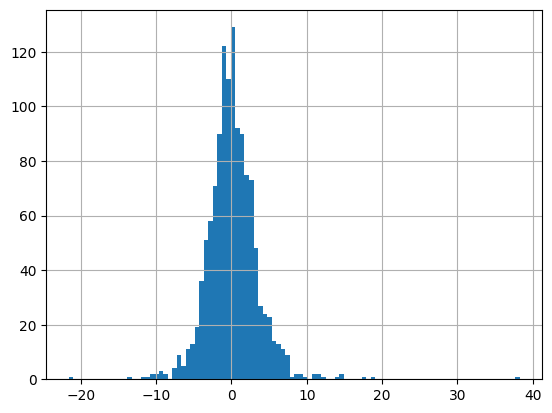

In [60]:
df.daily_change_percent.hist(bins=100)

<Axes: >

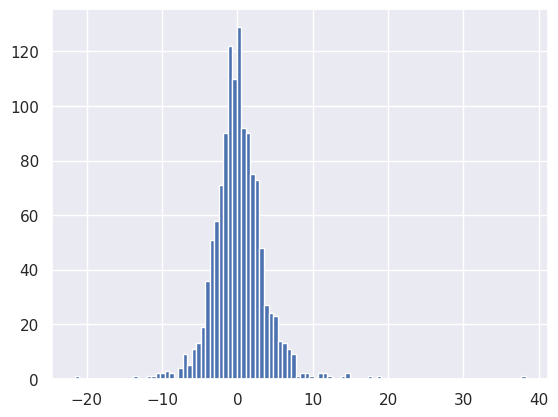

In [61]:
import seaborn as sns
sns.set()

df.daily_change_percent.hist(bins=100)

<Axes: xlabel='Date'>

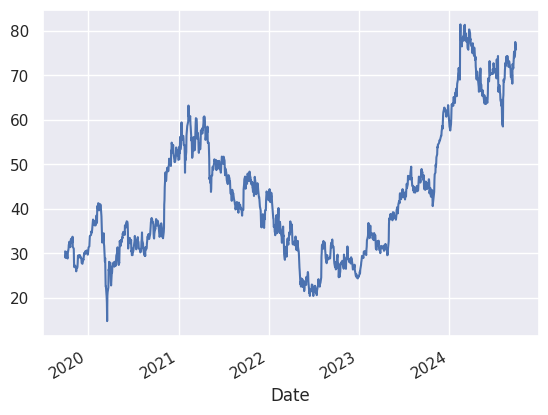

In [62]:
df.close.plot()

## Data Filtering

In [64]:
df

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2019-09-30,30.40,30.735,30.17,30.47,5021190,30.435,NaN,NaN
2019-10-01,30.37,30.510,28.65,29.15,13448055,29.760,30.47,-4.332130
2019-10-02,28.67,29.550,28.31,29.00,9371270,28.835,29.15,-0.514580
2019-10-03,28.97,29.880,28.52,29.72,9461973,29.345,29.00,2.482759
2019-10-04,29.90,30.180,28.90,29.67,8633938,29.785,29.72,-0.168237
...,...,...,...,...,...,...,...,...
2024-09-23,75.11,75.270,73.78,74.71,8285323,74.910,73.94,1.041385
2024-09-24,76.00,77.510,75.97,77.44,16099212,76.720,74.71,3.654129
2024-09-25,77.51,78.280,77.08,77.14,12552602,77.325,77.44,-0.387397


In [65]:
df.daily_change_percent >0

,daily_change_percent
Date,
2019-09-30,False
2019-10-01,False
2019-10-02,False
2019-10-03,True
2019-10-04,False
...,...
2024-09-23,True
2024-09-24,True
2024-09-25,False


In [68]:
df_plus = df[df.daily_change_percent>0]
df_plus

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2019-10-03,28.97,29.88,28.5200,29.72,9461973,29.345,29.00,2.482759
2019-10-07,30.62,30.75,29.8300,30.37,10151451,30.495,29.67,2.359285
2019-10-11,28.96,30.40,28.9400,30.13,10298616,29.545,28.87,4.364392
2019-10-14,30.22,31.54,29.8186,31.12,7966943,30.670,30.13,3.285762
2019-10-15,31.20,32.17,31.1950,32.00,7904528,31.600,31.12,2.827763
...,...,...,...,...,...,...,...,...
2024-09-17,71.97,73.73,71.3100,72.78,14639821,72.375,71.52,1.761745
2024-09-18,72.77,74.74,72.1920,73.50,11720932,73.135,72.78,0.989283
2024-09-19,74.98,76.46,74.5600,75.28,17698445,75.130,73.50,2.421769


In [69]:
df_minus = df[df.daily_change_percent<0]
df_minus

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2019-10-01,30.37,30.51,28.6500,29.15,13448055,29.760,30.47,-4.332130
2019-10-02,28.67,29.55,28.3100,29.00,9371270,28.835,29.15,-0.514580
2019-10-04,29.90,30.18,28.9000,29.67,8633938,29.785,29.72,-0.168237
2019-10-08,30.01,30.15,29.1700,29.28,7806911,29.645,30.37,-3.589068
2019-10-09,29.62,29.62,28.8100,29.07,7162775,29.345,29.28,-0.717213
...,...,...,...,...,...,...,...,...
2024-09-16,72.36,72.50,71.0400,71.52,12016670,71.940,72.48,-1.324503
2024-09-20,74.82,75.05,73.4511,73.94,17472693,74.380,75.28,-1.780021
2024-09-25,77.51,78.28,77.0800,77.14,12552602,77.325,77.44,-0.387397


In [70]:
df_plus.daily_change_percent.mean()

2.534592609661976

In [71]:
df_minus.daily_change_percent.mean()

-2.2355398224883487

In [72]:
df.close == df.high

,0
Date,
2019-09-30,False
2019-10-01,False
2019-10-02,False
2019-10-03,False
2019-10-04,False
...,...
2024-09-23,False
2024-09-24,False
2024-09-25,False


In [73]:
df[df.close == df.high]

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.483247
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,4.455446
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,1.278011
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,4.971182


In [74]:
df[df.close == df.low]

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.646088
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-1.630258
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-4.045155
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-1.711205
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-1.389425
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-1.835343
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-2.314694


In [75]:
df.index

DatetimeIndex(['2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03',
               '2019-10-04', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11',
               ...
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
               '2024-09-26', '2024-09-27'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [76]:
df.index > '2024-09-01'

array([False, False, False, ...,  True,  True,  True])

In [77]:
df[df.index > '2024-09-01']

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2024-09-03,72.57,73.610,71.2100,71.89,13053336,72.230,73.13,-1.695611
2024-09-04,71.52,72.690,71.3000,71.56,7995815,71.540,71.89,-0.459035
2024-09-05,71.08,72.620,70.9200,71.25,8890860,71.165,71.56,-0.433203
2024-09-06,71.13,72.020,68.7290,69.58,11449834,70.355,71.25,-2.343860
2024-09-09,70.95,71.190,69.6325,69.80,8804605,70.375,69.58,0.316183
2024-09-10,70.00,70.460,67.6400,68.99,20227244,69.495,69.80,-1.160458
2024-09-11,68.83,70.220,67.1200,70.11,14671855,69.470,68.99,1.623424
2024-09-12,70.06,70.490,67.8500,68.09,16381657,69.075,70.11,-2.881187
2024-09-13,72.40,72.755,70.9400,72.48,30376487,72.440,68.09,6.447349


In [81]:
df[(df.index >= '2024-09-01') & (df.index < '2024-09-16')] #UWAGA użyć '&' zamiast 'and'

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2024-09-03,72.57,73.610,71.2100,71.89,13053336,72.230,73.13,-1.695611
2024-09-04,71.52,72.690,71.3000,71.56,7995815,71.540,71.89,-0.459035
2024-09-05,71.08,72.620,70.9200,71.25,8890860,71.165,71.56,-0.433203
2024-09-06,71.13,72.020,68.7290,69.58,11449834,70.355,71.25,-2.343860
2024-09-09,70.95,71.190,69.6325,69.80,8804605,70.375,69.58,0.316183
2024-09-10,70.00,70.460,67.6400,68.99,20227244,69.495,69.80,-1.160458
2024-09-11,68.83,70.220,67.1200,70.11,14671855,69.470,68.99,1.623424
2024-09-12,70.06,70.490,67.8500,68.09,16381657,69.075,70.11,-2.881187
2024-09-13,72.40,72.755,70.9400,72.48,30376487,72.440,68.09,6.447349


In [83]:
df[(df.index == '2024-09-03') | (df.index == '2024-09-16')]

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2024-09-03,72.57,73.61,71.21,71.89,13053336,72.23,73.13,-1.695611
2024-09-16,72.36,72.50,71.04,71.52,12016670,71.94,72.48,-1.324503


In [87]:
df[(df.index.month == 5) & (df.index.year==2024)]

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2024-05-01,66.040,69.4100,65.8600,67.79,21276158,66.9150,66.27,2.293647
2024-05-02,68.400,69.0360,67.6250,68.57,18229306,68.4850,67.79,1.150612
2024-05-03,69.845,70.3386,69.0300,69.23,15557671,69.5375,68.57,0.962520
2024-05-06,71.000,73.8200,70.8320,71.51,25001918,71.2550,69.23,3.293370
2024-05-07,72.640,72.6400,69.8000,70.43,24427252,71.5350,71.51,-1.510278
2024-05-08,64.500,67.2000,63.8353,66.40,84219974,65.4500,70.43,-5.721993
2024-05-09,66.810,68.5700,66.7500,67.93,27965536,67.3700,66.40,2.304217
2024-05-10,67.820,67.9000,66.4000,66.99,18924391,67.4050,67.93,-1.383777
2024-05-13,67.000,67.0637,64.7200,66.02,18983132,66.5100,66.99,-1.447977


In [88]:
df[(df.index.day == 1) & (df.index.year==2024)]

,open,high,low,close,volume,avg,close_shift,daily_change_percent
Date,,,,,,,,
2024-02-01,66.12,66.85,65.59,66.73,12504225,66.425,65.27,2.236862
2024-03-01,79.50,81.47,79.32,81.03,18528745,80.265,79.50,1.924528
2024-04-01,77.00,77.78,76.00,76.40,12201773,76.700,76.99,-0.766333
2024-05-01,66.04,69.41,65.86,67.79,21276158,66.915,66.27,2.293647
2024-07-01,72.20,72.58,69.40,71.10,13438725,71.650,72.68,-2.173913
2024-08-01,64.86,65.00,60.76,61.02,18967935,62.940,64.47,-5.351326
